<a href="https://colab.research.google.com/github/weso500/IOT-Anomaly-Detection/blob/main/Initial_Second_Level_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import pickle
import itertools
from keras import layers
import random
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
x_train = pd.read_csv('/content/Total_Train.csv' )

In [3]:
x_test = pd.read_csv('/content/Total_Test.csv' )

In [4]:
x_train.shape

(500, 14)

In [5]:
# Input layer
input = tf.keras.layers.Input(shape=(14,))
# Encoder layers
encoder = tf.keras.Sequential([
  layers.Dense(100, activation='relu'),
  layers.Dense(50, activation='relu'),
  layers.Dense(80, activation='relu'),
  layers.Dense(90, activation='relu'),
  layers.Dense(40, activation='relu')])(input)
# Decoder layers
decoder = tf.keras.Sequential([
      layers.Dense(40, activation="relu"),
      layers.Dense(50, activation="relu"),
      layers.Dense(100, activation="relu"),
      layers.Dense(90, activation='relu'),
      layers.Dense(14, activation="sigmoid")])(encoder)
# Create the autoencoder
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)

In [6]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mae')
# Fit the autoencoder
history = autoencoder.fit(x_train, x_train,
          epochs=20,
          batch_size = 1,
          validation_data=(x_train, x_train),
          shuffle=True)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.1150 - val_loss: 0.0019
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0018 - val_loss: 5.9278e-04
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.2460e-04 - val_loss: 3.0938e-04
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.8764e-04 - val_loss: 3.0559e-04
Epoch 12/20
500/500 ━━━━━━━━━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[0.00083026 0.00093817 0.00350308 ... 0.00325716 0.00147042 0.00115395]
 [0.00085011 0.00096026 0.00356835 ... 0.00331834 0.00150294 0.00117997]
 [0.00081013 0.00091576 0.00343656 ... 0.00319481 0.00143739 0.00112753]
 ...
 [0.00228606 0.00253958 0.00771259 ... 0.00722779 0.00375592 0.00299839]
 [0.00054518 0.00061965 0.00252108 ... 0.00233811 0.00099622 0.00077593]
 [0.00200367 0.00223186 0.00696383 ... 0.00651741 0.00332426 0.00264807]]
The prediction loss threshold for 2% of outliers is 0.00


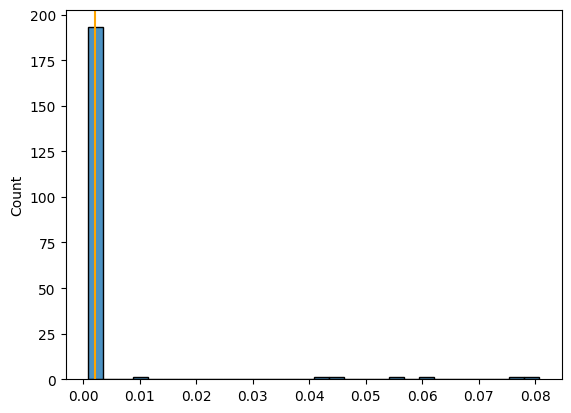

In [10]:
# Predict anomalies/outliers in the training dataset
prediction = autoencoder.predict(x_test)
print(prediction)
# Get the mean absolute error between actual and reconstruction/prediction
prediction_loss = tf.keras.losses.mae(prediction, x_test)
# Check the prediction loss threshold for 2% of outliers
loss_threshold = np.percentile(prediction_loss, 95)
#loss_threshold = 1.60782888
print(f'The prediction loss threshold for 2% of outliers is {loss_threshold:.2f}')
# Visualize the threshold
sns.histplot(prediction_loss, bins=30, alpha=0.8)
plt.axvline(x=loss_threshold, color='orange')

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       190
           1       0.70      0.70      0.70        10

    accuracy                           0.97       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.97      0.97      0.97       200



<Axes: >

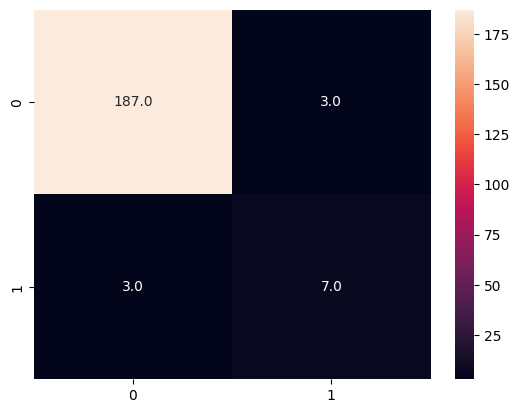

In [8]:
data = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
y_test = pd.DataFrame(data, columns=['Target'])
# Check the model performance at 2% threshold
threshold_prediction = [0 if i < loss_threshold else 1 for i in prediction_loss]
# # Check the prediction performance
print(classification_report(y_test, threshold_prediction))
cf_matrix = confusion_matrix(y_test, threshold_prediction)
sns.heatmap(cf_matrix, annot=True, fmt = ".1f")

[       inf 0.08071301 0.01120489 0.00115321 0.00084718]
0.7


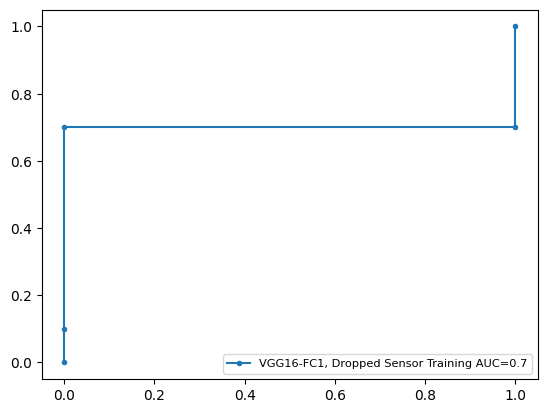

In [9]:
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_loss , pos_label=1)
print(thresholds)
#pyplot.plot(fpr, tpr, marker='.', label='Logistic')
auc = metrics.auc(fpr, tpr)
print(auc)

#plt.figure(0).clf()
#fpr, tpr, _ = metrics.roc_curve(y_test, prediction_loss)
#auc = round(metrics.roc_auc_score(y_test, prediction_loss), 4)
plt.plot(fpr,tpr,marker='.',label="VGG16-FC1, Dropped Sensor Training AUC="+str(auc))
plt.legend(loc='lower right', prop={'size': 8.2})

In [12]:
pip install sewar

  Preparing metadata (setup.py) ... done
  Created wheel for sewar: filename=sewar-0.4.6-py3-none-any.whl size=11419 sha256=7c25b982985dac3341387e390e97e2658df933285856bd032be3c23764f63217
  Stored in directory: /root/.cache/pip/wheels/3f/af/02/9c6556ba287b62a945d737def09b8b8c35c9e1d82b9dfae84c
Successfully built sewar


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.10/dist-packages/sewar/utils.py:18: UserWarning: Supplied images have different dtypes float32 and float64
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

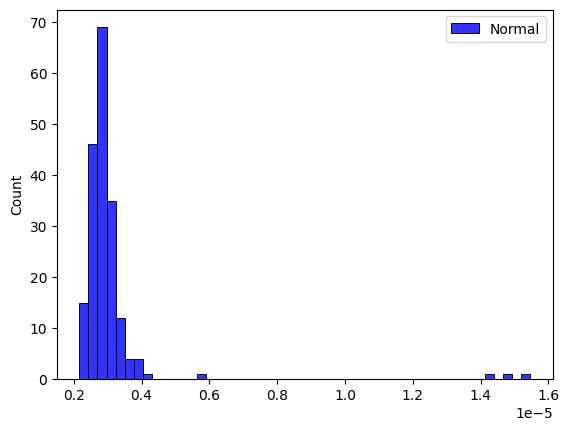

In [39]:
from urllib.request import AbstractBasicAuthHandler
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

mse_values = [] # Create an empty list to store mse values
mse_values_normal_plot = []
mse_values_anomaly_plot = []
prediction = []

for i in range(190):
  # Reshape to (1, 14) for single sample prediction
  input_data = x_test.iloc[i].values.reshape(1, -1)
  pred = autoencoder.predict(input_data)
  rmse(pred, input_data)
  mse_values_normal_plot.append(mse(pred, input_data))

count = 190
for i in range(10):
  # Reshape to (1, 14) for single sample prediction
  input_data = x_test.iloc[count].values.reshape(1, -1)
  pred = autoencoder.predict(input_data)
  rmse(pred, input_data)
  mse_values_anomaly_plot.append(mse(pred, input_data))
  count = count + 1


for i in range(len(x_test)):
  # Reshape to (1, 14) for single sample prediction
  input_data = x_test.iloc[i].values.reshape(1, -1)
  pred = autoencoder.predict(input_data)
  rmse(pred, input_data)
  mse_values.append(mse(pred, input_data))

norm = [float(i)/sum(mse_values) for i in mse_values]

loss_threshold = np.percentile(mse_values, 95) # Calculate the threshold on the list of mse values
print(f'The prediction loss threshold for 5% of outliers is {loss_threshold:.2f}')

prediction = []
actual = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]

for i in range(len(mse_values)): # Use range() to generate indices
  if mse_values[i] > loss_threshold:
    prediction.append(1)
  else:
    prediction.append(0)

print(prediction)

# Visualize the threshold using the list of mse values
sns.histplot(mse_values_normal_plot, bins=50, alpha=0.8, color='blue', label='Normal')
#sns.histplot(mse_values_anomaly_plot, bins=50, alpha=0.8, color='red', label='Anomaly')
#plt.axvline(x=loss_threshold, color='orange')
#plt.xlim([0.0, 0.0003])
plt.legend()
plt.show()